In [8]:
import glob
import json
import os

import matplotlib.pyplot as plt

In [9]:
metrics = ["loss", "accuracy", "precision", "recall", "f1_score"]

In [5]:
def extract_metrics(iid: bool = True) -> tuple[list[float], list[float], list[float], list[float], list[float]]:
    losses = []
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    directory = "model/iid/" if iid else "model/dirichlet/"

    json_files = glob.glob(os.path.join(directory, "iid_fedavg_r*.json" if iid else "dirich_fedavg_r*.json"))

    for file_path in json_files:
        try:
            with open(file_path, "r") as file:
                data = json.load(file)

                losses.append(data["test"]["loss"])
                accuracies.append(data["test"]["accuracy"])
                precisions.append(data["test"]["precision"])
                recalls.append(data["test"]["recall"])
                f1_scores.append(data["test"]["f1_score"])
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    return losses, accuracies, precisions, recalls, f1_scores

In [6]:
iid_losses, iid_accuracies, iid_precisions, iid_recalls, iid_f1_scores = extract_metrics()

print("Losses:", iid_losses)
print("Accuracies:", iid_accuracies)
print("Precisions:", iid_precisions)
print("Recalls:", iid_recalls)
print("F-Scores:", iid_f1_scores)

Losses: [1.0993475868966844, 1.1142143244213527, 0.9855723773108588, 0.9060820362302993, 0.8711091740926107, 0.8477803042199876, 0.8279138806131151, 0.8155801012780931]
Accuracies: [0.33305555555555555, 0.3343055555555556, 0.48444444444444446, 0.5959722222222222, 0.6272222222222222, 0.6380555555555556, 0.6497222222222222, 0.6581944444444444]
Precisions: [0.11104838709677418, 0.1215905017921147, 0.5458670339097111, 0.6732320290130308, 0.683606699176972, 0.6866173017183382, 0.6947122481139306, 0.6986298356886967]
Recalls: [0.333042328042328, 0.33428209650431867, 0.4845740751177627, 0.5957742761512971, 0.6273636200528185, 0.6383793421665799, 0.6495192246757434, 0.6578672250172078]
F-Scores: [0.16655972351266513, 0.17831967969108012, 0.5133976328714621, 0.6321392149665771, 0.6542786929607821, 0.661620243966769, 0.671356042321001, 0.6776360740207983]


In [7]:
niid_losses, niid_accuracies, niid_precisions, niid_recalls, niid_f1_scores = extract_metrics(iid=False)

print("Losses:", niid_losses)
print("Accuracies:", niid_accuracies)
print("Precisions:", niid_precisions)
print("Recalls:", niid_recalls)
print("F-Scores:", niid_f1_scores)

Losses: [1.1441355477439032, 1.087931186887953, 1.016539051797655, 0.9900925188594394, 0.9770527217123244, 0.9444686828719245, 0.952047487894694, 0.9407069407569038]
Accuracies: [0.36041666666666666, 0.4801388888888889, 0.5288888888888889, 0.5615277777777777, 0.57625, 0.5969444444444445, 0.6004166666666667, 0.6116666666666667]
Precisions: [0.2934341395397198, 0.3608554686879067, 0.5697073943813313, 0.645662799538284, 0.6660695584633898, 0.680638775227012, 0.6788128824151812, 0.692162483318495]
Recalls: [0.3599711998814166, 0.479337093387317, 0.5291233834391729, 0.5617748659117768, 0.575388059576398, 0.5956956241976881, 0.5988810601609018, 0.6109205418605143]
F-Scores: [0.3233148948242804, 0.4117423059936414, 0.5486659277660074, 0.6008047338818814, 0.6174169222019712, 0.6353406133138157, 0.6363467261213437, 0.6490089598187573]


In [12]:
pct_loss = []
pct_acc = []
pct_prec = []
pct_rec = []
pct_f1 = []

for i in range(len(iid_losses)):
    pct_loss.append(100.0 * (iid_losses[i] - niid_losses[i]) / niid_losses[i])
    pct_acc.append(100.0 * (iid_accuracies[i] - niid_accuracies[i]) / niid_accuracies[i])
    pct_prec.append(100.0 * (iid_precisions[i] - niid_precisions[i]) / niid_precisions[i])
    pct_rec.append(100.0 * (iid_recalls[i] - niid_recalls[i]) / niid_recalls[i])
    pct_f1.append(100.0 * (iid_f1_scores[i] - niid_f1_scores[i]) / niid_f1_scores[i])

In [20]:
print("Loss Percentage Change:", pct_loss)
print("Accuracy Percentage Change:", pct_acc)
print("Precision Percentage Change:", pct_prec)
print("Recall Percentage Change:", pct_rec)
print("F-Score Percentage Change:", pct_f1)

Loss Percentage Change: [-3.914567721939524, 2.4158823508482192, -3.0462847868003147, -8.485114373545414, -10.843176142434091, -10.237330300664762, -13.038594068041833, -13.301362417729388]
Accuracy Percentage Change: [-7.591522157996148, -30.373155915533697, -8.403361344537807, 6.134058867177848, 8.84550494094962, 6.886924150767796, 8.211889891279194, 7.606721162579464]
Precision Percentage Change: [-62.15560082035292, -66.30493027188268, -4.184667551578722, 4.269911398714885, 2.6329293225830823, 0.878369953185849, 2.342230990399043, 0.9343691006185143]
Recall Percentage Change: [-7.480840647240581, -30.26158394251164, -8.419455596887545, 6.052141578875769, 9.033131572922283, 7.165356976791683, 8.45546267588369, 7.684580880800123]
F-Score Percentage Change: [-48.483745667458564, -56.69143610085238, -6.428008941278083, 5.215418474191999, 5.97032077244436, 4.136305802313454, 5.501610169827675, 4.410896609198652]


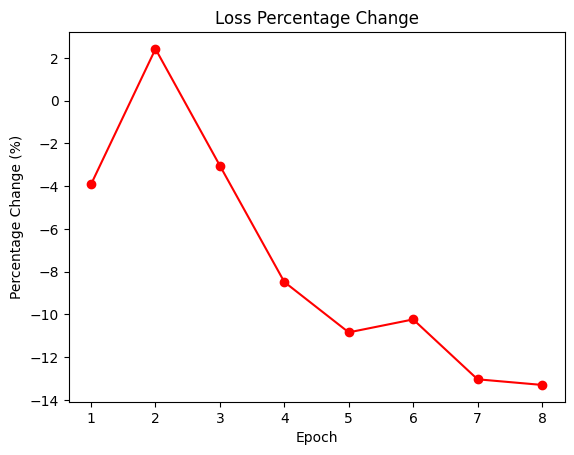

In [21]:
plt.plot(range(1, len(iid_losses) + 1), pct_loss, label="Loss", color="red", marker="o")

plt.title("Loss Percentage Change")
plt.xlabel("Epoch")
plt.ylabel("Percentage Change (%)")
plt.show()

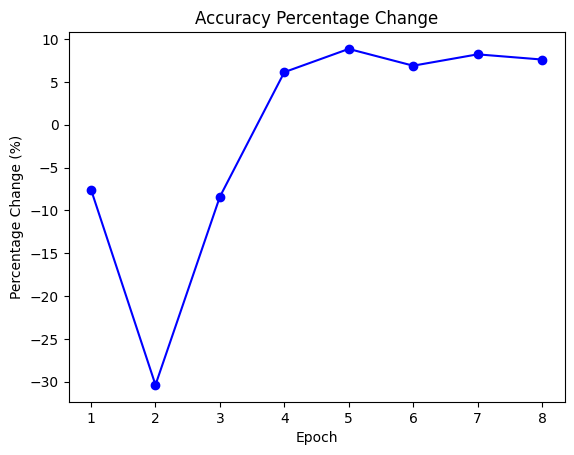

In [22]:
plt.plot(range(1, len(iid_accuracies) + 1), pct_acc, label="Accuracy", color="blue", marker="o")

plt.title("Accuracy Percentage Change")
plt.xlabel("Epoch")
plt.ylabel("Percentage Change (%)")
plt.show()

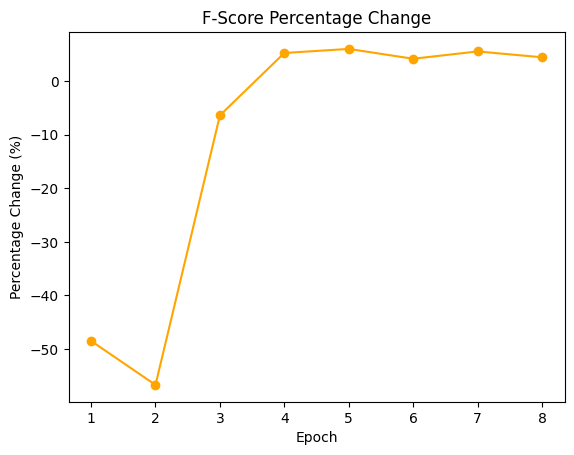

In [23]:
plt.plot(range(1, len(iid_f1_scores) + 1), pct_f1, label="F-Score", color="orange", marker="o")

plt.title("F-Score Percentage Change")
plt.xlabel("Epoch")
plt.ylabel("Percentage Change (%)")
plt.show()